# Imports

In [1]:
from numpy.random import seed
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

In [57]:
import os
import numpy as np
import tensorflow as tf
import keras
import itertools


from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout


from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Constantes

In [3]:
LABEL_NAMES = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
VALIDATION_SIZE = 10000
SMALL_SIZE=1000

LOG_DIR = 'tensorboard_cifar_logs/'

# Get the Data

In [4]:
(x_train_all, y_train_all) , (x_test, y_test) = cifar10.load_data()

# Explore

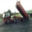

In [5]:
pic = array_to_img(x_train_all[2])
display(pic)

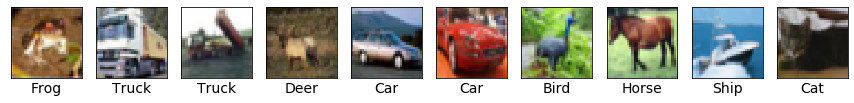

In [6]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10 , i+1)
    plt.imshow(x_train_all[i])
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)

plt.show()

# Preprocess Data

In [7]:
x_train_all, x_test = x_train_all / 255.0 , x_test / 255.0

In [8]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], 32*32*3)

In [9]:
x_train_all.shape

(50000, 3072)

In [10]:
x_test = x_test.reshape(x_test.shape[0], 32*32*3)

# Validation Set

In [11]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

In [12]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

In [13]:
x_train_xs = x_train[:SMALL_SIZE]
y_train_xs = y_train[:SMALL_SIZE]

# Define Neural Network

In [14]:
model_1 = Sequential([Dense(units=128, input_dim = 3072, activation='relu', name='m1_hidden1'),
                     Dense(units=64, activation='relu', name='m1_hidden2'),
                     Dense(units=16, activation='relu', name='m1_hidden3'),
                     Dense(units=10, activation='softmax', name='m1_output')])

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(3072,)))
model_2.add(Dense(128, activation='relu', name="m2_hidden1"))
model_2.add(Dense(64, activation='relu', name="m2_hidden2"))
model_2.add(Dense(16, activation='relu', name="m2_hidden3"))
model_2.add(Dense(10, activation='softmax', name="m2_output"))

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [16]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(3072,)))
model_3.add(Dense(128, activation='relu', name="m3_hidden1"))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name="m3_hidden2"))
model_3.add(Dense(16, activation='relu', name="m3_hidden3"))
model_3.add(Dense(10, activation='softmax', name="m3_output"))

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [17]:
type(model_1)

keras.engine.sequential.Sequential

In [18]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


# Tensorboard

In [19]:
def get_tensorboard(model_name):  
    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Exito')

    return TensorBoard(log_dir=dir_paths)

# Fit the model

In [20]:
samples_per_batch = 1000

In [21]:
#nr_epochs=150
#model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch,
            #epochs=nr_epochs, verbose=0, validation_data=(x_val,y_val) ,
            #callbacks=[get_tensorboard('Model 1')])

In [22]:
#nr_epochs=150
#model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch,
            #epochs=nr_epochs, verbose=0, validation_data=(x_val,y_val) ,
            #callbacks=[get_tensorboard('Model 2')])

In [23]:
#nr_epochs=150
#model_3.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch,
            #epochs=nr_epochs, verbose=0, validation_data=(x_val,y_val) ,
            #callbacks=[get_tensorboard('Model 2')])

In [24]:
nr_epochs=100
model_1.fit(x_train, y_train, batch_size=samples_per_batch,
            epochs=nr_epochs, verbose=0, validation_data=(x_val,y_val) ,
            callbacks=[get_tensorboard('Model 1 XL')])

Exito






In [25]:
nr_epochs=100
model_2.fit(x_train, y_train, batch_size=samples_per_batch,
            epochs=nr_epochs, verbose=0, validation_data=(x_val,y_val) ,
            callbacks=[get_tensorboard('Model 2 XL')])

Exito


In [26]:
nr_epochs=100
model_3.fit(x_train, y_train, batch_size=samples_per_batch,
            epochs=nr_epochs, verbose=0, validation_data=(x_val,y_val) ,
            callbacks=[get_tensorboard('Model 3 XL')])

Exito


# Predictions

In [27]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [28]:
np.set_printoptions(precision=3)

In [29]:
model_3.predict_classes(test)

array([6], dtype=int64)

In [30]:
y_val[0]

array([6], dtype=uint8)

In [31]:
x_val[1].shape

(3072,)

In [32]:
for i in range(10):
    test = np.expand_dims(x_val[i], axis=0)
    predicted = model_3.predict_classes(test)
    actual = y_val[i]
    print(f'Predicho : {predicted}, Actual : {actual}')
    

Predicho : [6], Actual : [6]
Predicho : [1], Actual : [9]
Predicho : [9], Actual : [9]
Predicho : [6], Actual : [4]
Predicho : [8], Actual : [1]
Predicho : [9], Actual : [1]
Predicho : [2], Actual : [2]
Predicho : [7], Actual : [7]
Predicho : [8], Actual : [8]
Predicho : [7], Actual : [3]


In [33]:
for i in range(10):
    test = np.expand_dims(x_val[i], axis=0)
    predicted = model_2.predict_classes(test)
    actual = y_val[i]
    print(f'Predicho : {predicted}, Actual : {actual}')

Predicho : [6], Actual : [6]
Predicho : [1], Actual : [9]
Predicho : [9], Actual : [9]
Predicho : [6], Actual : [4]
Predicho : [8], Actual : [1]
Predicho : [9], Actual : [1]
Predicho : [6], Actual : [2]
Predicho : [7], Actual : [7]
Predicho : [8], Actual : [8]
Predicho : [9], Actual : [3]


In [34]:
for i in range(10):
    test = np.expand_dims(x_val[i], axis=0)
    predicted = model_1.predict_classes(test)
    actual = y_val[i]
    print(f'Predicho : {predicted}, Actual : {actual}')

Predicho : [6], Actual : [6]
Predicho : [1], Actual : [9]
Predicho : [9], Actual : [9]
Predicho : [6], Actual : [4]
Predicho : [8], Actual : [1]
Predicho : [9], Actual : [1]
Predicho : [2], Actual : [2]
Predicho : [7], Actual : [7]
Predicho : [8], Actual : [8]
Predicho : [9], Actual : [3]


# Evaluation

In [35]:
model_3.metrics_names

['loss', 'accuracy']

In [36]:
test_loss, test_accuracy = model_3.evaluate(x_test, y_test)
print(f'Loss {test_loss} Accuracy {test_accuracy}')

10000/10000 [==============================] - 0s 27us/step
Loss 1.4506679668426514 Accuracy 0.4814999997615814


In [37]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Loss {test_loss} Accuracy {test_accuracy}')

10000/10000 [==============================] - 0s 27us/step
Loss 1.4485700283050538 Accuracy 0.4884999990463257


# Confusion Matrix

In [43]:
conf_matrix = confusion_matrix(y_test, model_2.predict_classes(x_test) )

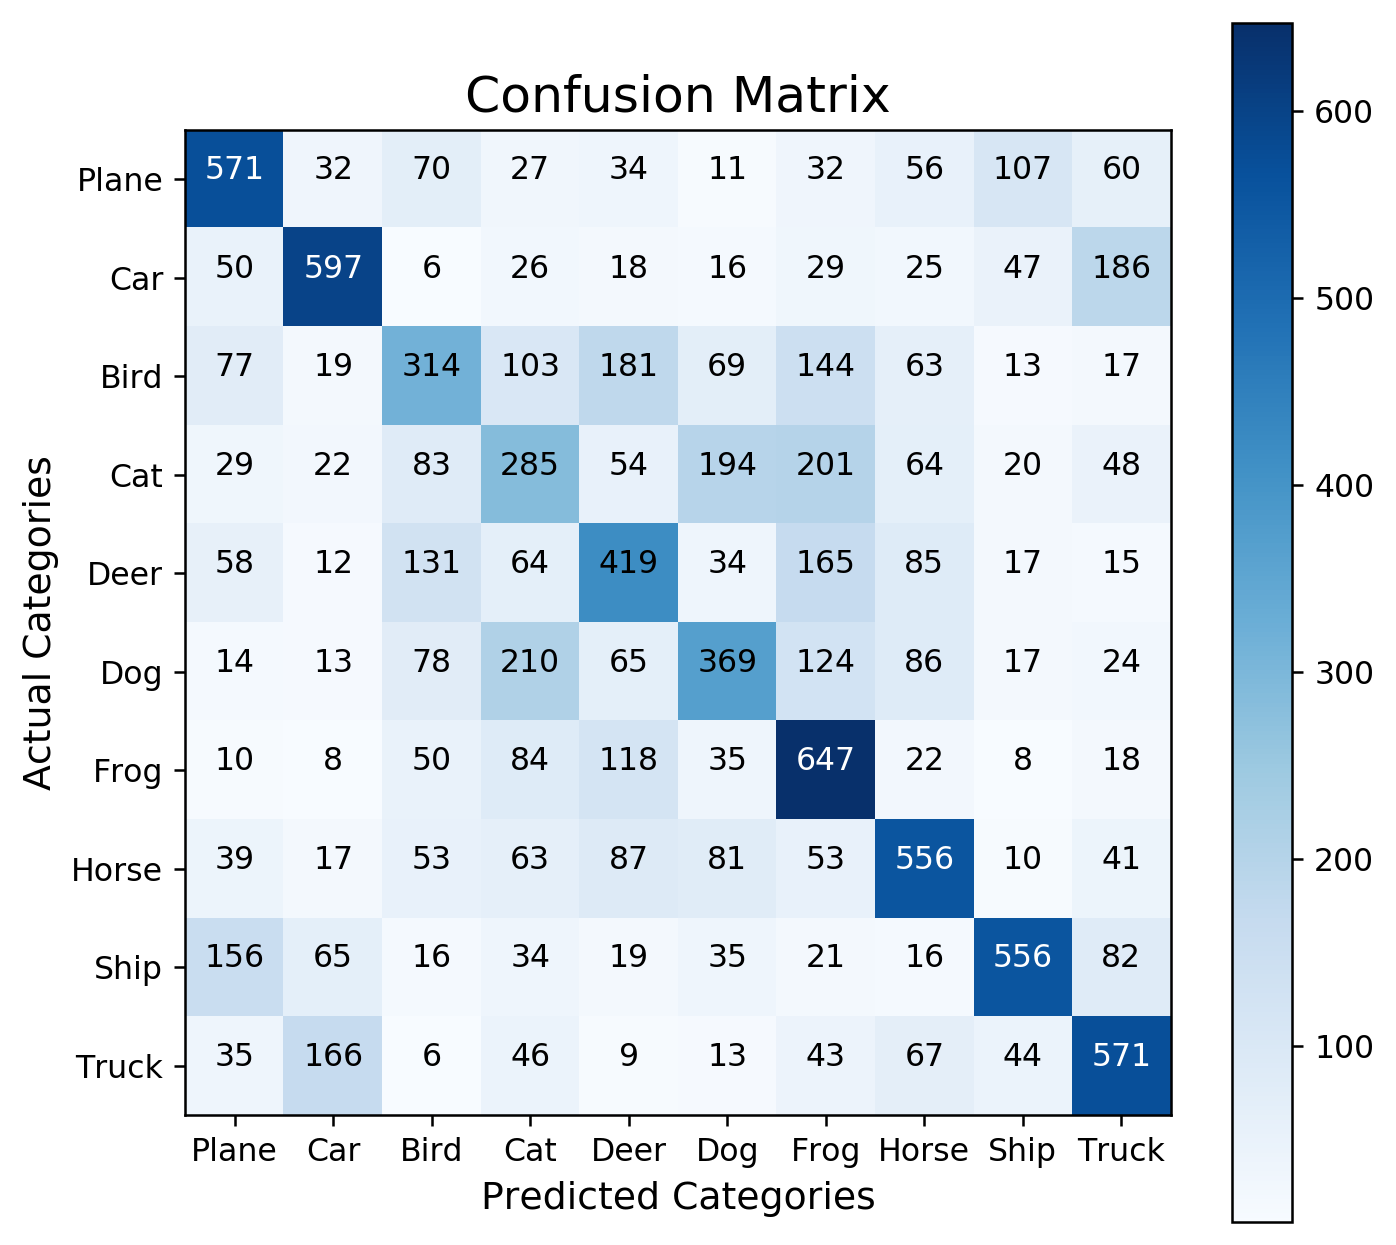

In [61]:
plt.figure(figsize=(7,7), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Categories', fontsize=12)
plt.ylabel('Actual Categories', fontsize=12)

tick_marks = np.arange(0,10)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i,j in itertools.product(range(10), range(10)):
    plt.text(j,i, conf_matrix[i,j], horizontalalignment='center',
            color='white' if conf_matrix[i,j] > 450 else 'black')

plt.show()

In [62]:
np.diag(conf_matrix)

array([571, 597, 314, 285, 419, 369, 647, 556, 556, 571], dtype=int64)

In [63]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

In [64]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)

In [67]:
avg_call = np.mean(recall)
print(f'Recall score Model 2 : {avg_call:.2%}')
avg_pres = np.mean(precision)
print(f'Precision score Model 2 : {avg_pres:.2%}')

Recall score Model 2 : 48.85%
Precision score Model 2 : 48.95%


In [70]:
f_score = 2*((avg_pres*avg_call)/(avg_pres+avg_call))
print(f'F Score Model 2: {f_score:.2%}')

F Score Model 2: 48.90%
